In [323]:
import os
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
from astropy import constants as const

############################
# Custom scripts
import get_ZdepSFRD as Z_SFRD
import paths
import init_values as In

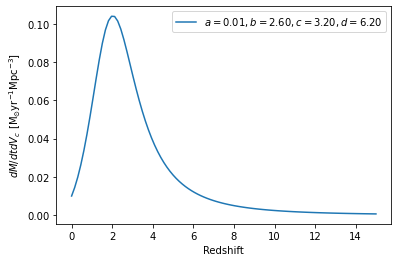

In [324]:
# plot SFRD(z)

redshift_list  = np.linspace(0,15, num=100)
y_vals = Z_SFRD.Madau_Dickinson2014(redshift_list, a=0.01, b=2.6, c=3.2,  d=6.2) #test with M&F 2017 vals
plt.plot(redshift_list, y_vals,label = '$a=%.2f, b=%.2f, c=%.2f, d=%.2f$'% (0.01, 2.6, 3.2,  6.2))
plt.xlabel("Redshift")
plt.ylabel(r'$dM/dt dV_c$ $\mathrm{[M_{\odot} yr^{-1} Mpc^{-3}]}$')
plt.legend();

In [325]:
fit_param_filename = 'test_best_fit_parameters_TNG100.txt'
mu0_best, muz_best, omega0_best, omegaz_best, alpha0_best,sf_a_best, sf_b_best, sf_c_best, sf_d_best = np.loadtxt(str(paths.data)+'/'+fit_param_filename,unpack=True, delimiter=',')

In [326]:
mu0 = mu0_best
muz = muz_best
omega0 = omega0_best
omegaz = omegaz_best
alpha = alpha0_best

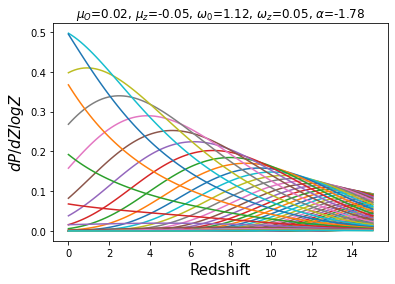

In [390]:
#dPdlogZ over redshift
metal_bins = np.logspace(-10, 0, 61) #60 bins
center_Zbin = (metal_bins[:-1] + metal_bins[1:])/2

dPdlogZ, metallicities, step_logZ, p_draw_metallicity = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=omegaz, alpha =alpha, metals=center_Zbin)

#indices = np.arange(0, 60, 10)
for i in range(0, 60): #indices:
    plt.plot(redshift_list, dPdlogZ[:,i],label=metallicities[i])
plt.xlabel("Redshift", size=15)
plt.ylabel(r"$dP/dZlogZ$", size=15)
plt.title(label=r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\omega_z$=%.2f, $\alpha$=%.2f'%(mu0, muz, omega0, omegaz, alpha));
plt.savefig("dPdlogZvsredshift_all.png")
#plt.legend();

In [379]:
np.sum(dPdlogZ, axis=1)

array([2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576689,
       2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576689,
       2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576689,
       2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576689,
       2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576689,
       2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576689,
       2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576689,
       2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576689,
       2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576689,
       2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576689,
       2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576689,
       2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576689,
       2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576689,
       2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576689,
       2.60576689, 2.60576689, 2.60576689, 2.60576689, 2.60576

In [388]:
len(dPdlogZ[0,:])

60

In [380]:
np.sum(dPdlogZ[:,0])

0.051059346464189005

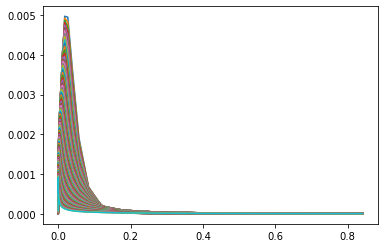

In [375]:
step_logZ = 0.01
plt.plot(metallicities, (dPdlogZ*step_logZ).T);

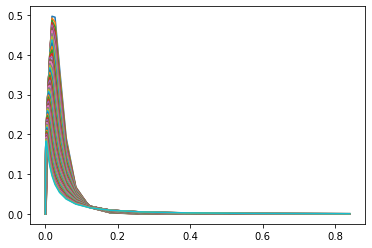

In [376]:
#dPdlogZ over metallicity
for i in range(0,60):
    plt.plot(metallicities, dPdlogZ[i,:])

In [367]:
metallicities

array([1.23389963e-10, 1.81111698e-10, 2.65835618e-10, 3.90193325e-10,
       5.72725476e-10, 8.40646035e-10, 1.23389963e-09, 1.81111698e-09,
       2.65835618e-09, 3.90193325e-09, 5.72725476e-09, 8.40646035e-09,
       1.23389963e-08, 1.81111698e-08, 2.65835618e-08, 3.90193325e-08,
       5.72725476e-08, 8.40646035e-08, 1.23389963e-07, 1.81111698e-07,
       2.65835618e-07, 3.90193325e-07, 5.72725476e-07, 8.40646035e-07,
       1.23389963e-06, 1.81111698e-06, 2.65835618e-06, 3.90193325e-06,
       5.72725476e-06, 8.40646035e-06, 1.23389963e-05, 1.81111698e-05,
       2.65835618e-05, 3.90193325e-05, 5.72725476e-05, 8.40646035e-05,
       1.23389963e-04, 1.81111698e-04, 2.65835618e-04, 3.90193325e-04,
       5.72725476e-04, 8.40646035e-04, 1.23389963e-03, 1.81111698e-03,
       2.65835618e-03, 3.90193325e-03, 5.72725476e-03, 8.40646035e-03,
       1.23389963e-02, 1.81111698e-02, 2.65835618e-02, 3.90193325e-02,
       5.72725476e-02, 8.40646035e-02, 1.23389963e-01, 1.81111698e-01,
      

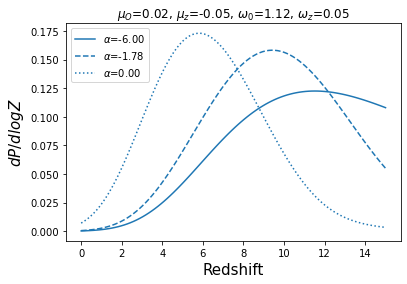

In [328]:
dPdlogZ1, metallicities1, step_logZ1, p_draw_metallicity1 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=omegaz, alpha =-6, metals=center_Zbin)
dPdlogZ2, metallicities2, step_logZ2, p_draw_metallicity2 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=omegaz, alpha =0, metals=center_Zbin)

indices = np.arange(0, 60, 10)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ1[:,i], c=colors[j], ls='-', label=r'$\alpha$=%.2f'%-6)
    else:
        plt.plot(redshift_list, dPdlogZ1[:,i], c=colors[j], ls='-')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--', label=r'$\alpha$=%.2f'%alpha)
    else:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ2[:,i], c=colors[j], ls=':', label=r'$\alpha$=%.2f'%0)
    else:
        plt.plot(redshift_list, dPdlogZ2[:,i], c=colors[j], ls=':')
plt.xlabel("Redshift", size=15)
plt.ylabel(r"$dP/dlogZ$", size=15)
plt.title(label=r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\omega_z$=%.2f'%(mu0, muz, omega0, omegaz))
plt.legend();

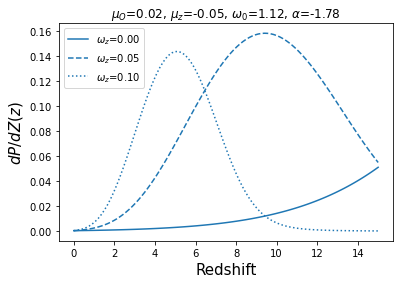

In [329]:
dPdlogZ3, metallicities3, step_logZ3, p_draw_metallicity3 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=0, alpha =alpha, metals=center_Zbin)
dPdlogZ4, metallicities2, step_logZ4, p_draw_metallicity4 = Z_SFRD.skew_metallicity_distribution(redshift_list, mu_z =muz, 
                                                        mu_0 =mu0, omega_0=omega0,omega_z=0.1, alpha =alpha, metals=center_Zbin)

indices = np.arange(0, 60, 10)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ3[:,i], c=colors[j], ls='-', label=r'$\omega_z$=%.2f'%0)
    else:
        plt.plot(redshift_list, dPdlogZ3[:,i], c=colors[j], ls='-')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--', label=r'$\omega_z$=%.2f'%omegaz)
    else:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ4[:,i], c=colors[j], ls=':', label=r'$\omega_z$=%.2f'%0.1)
    else:
        plt.plot(redshift_list, dPdlogZ4[:,i], c=colors[j], ls=':')
plt.xlabel("Redshift", size=15)
plt.ylabel(r"$dP/dZ(z)$", size=15)
plt.title(label=r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f, $\alpha$=%.2f'%(mu0, muz, omega0, alpha))
plt.legend();

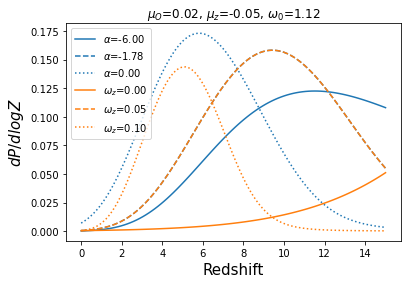

In [330]:
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ1[:,i], c='tab:blue', ls='-', label=r'$\alpha$=%.2f'%-6)
    else:
        plt.plot(redshift_list, dPdlogZ1[:,i], c='tab:blue', ls='-')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ[:,i], c='tab:blue', ls='--', label=r'$\alpha$=%.2f'%alpha)
    else:
        plt.plot(redshift_list, dPdlogZ[:,i], c='tab:blue', ls='--')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ2[:,i], c='tab:blue', ls=':', label=r'$\alpha$=%.2f'%0)
    else:
        plt.plot(redshift_list, dPdlogZ2[:,i], c='tab:blue', ls=':')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ3[:,i], c='tab:orange', ls='-', label=r'$\omega_z$=%.2f'%0)
    else:
        plt.plot(redshift_list, dPdlogZ3[:,i], c='tab:orange', ls='-')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ[:,i], c='tab:orange', ls='--', label=r'$\omega_z$=%.2f'%omegaz)
    else:
        plt.plot(redshift_list, dPdlogZ[:,i], c=colors[j], ls='--')
for j, i in enumerate(indices[4:5]):
    if j==0:
        plt.plot(redshift_list, dPdlogZ4[:,i], c='tab:orange', ls=':', label=r'$\omega_z$=%.2f'%0.1)
    else:
        plt.plot(redshift_list, dPdlogZ4[:,i], c='tab:orange', ls=':')
plt.xlabel("Redshift", size=15)
plt.ylabel(r"$dP/dlogZ$", size=15)
plt.title(label=r'$\mu_O$=%.2f, $\mu_z$=%.2f, $\omega_0$=%.2f'%(mu0, muz, omega0))
plt.legend();
plt.savefig('dPdlogZ_comparison.png', bbox_inches='tight')

In [ ]:
#low -> high resolution = skewness (alpha) increases (less negative, less skewed)
#low -> high resolution = redshift evolution of variance (omega_z) increases

In [ ]:
# at a certain redshift, probability of getting a particular logZ

In [383]:
-0.1/-2

0.05

In [384]:
.1/0.01

10.0